In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from LassoRegrression import Lasso_Regression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#%matplotlib inline
plt.style.use('fivethirtyeight')

This py file contains alog for Lasso regression


### Data Ingestions

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing.data, columns = housing.feature_names)
df_target = pd.DataFrame(housing.target, columns = housing.target_names)
df_final = pd.concat([df,df_target],axis = 1)
df_final.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### EDA

In [3]:
df_final.describe()
df_final.shape

(20640, 9)

#### Check if any nulls inthe data

In [4]:
df_final.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

#### Splitting the Test and Training data

In [5]:
X = df_final.iloc[:,:-1]
y = df_final.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [16]:
# Hyperparams initialziations 
lr = 0.0001
max_iterations = 50
lasso_pen = 0.1
model_Lasso = Lasso_Regression(lr,max_iterations,lasso_pen)

Initailizing the Lasso Regression Class


### Fitting the Lasso Regression Model

In [17]:
model_Lasso.fit(X_train,y_train)

[0. 0. 0. ... 0. 0. 0.]
[-1.214 -3.637 -2.056 ... -2.221 -2.835 -3.25 ]
Udpating the Weights and bias now
weights [ 1.82709652e-03  1.15408381e-02  2.22423473e-03  4.26665727e-04
  5.56346411e-01  1.17037044e-03  1.39537119e-02 -4.70594105e-02] and bias 0.0004133272409603703
[ 410.17995018  571.37237556  587.37026955 ...  983.42450903  995.09369563
 1463.97502666]
[ 408.96595018  567.73537556  585.31426955 ...  981.20350903  992.25869563
 1460.72502666]
Udpating the Weights and bias now
weights [-6.19115615e-01 -4.09122993e+00 -8.44535853e-01 -1.71192665e-01
 -3.74663463e+02 -6.22085645e-01 -5.66601094e+00  1.90771755e+01] and bias -0.1596804484360563
[-274537.66976003 -382972.14379147 -393777.31929862 ... -660515.09639348
 -668389.18490476 -984011.9070073 ]
[-274538.88376003 -382975.78079147 -393779.37529862 ... -660517.31739348
 -668392.01990476 -984015.1570073 ]
Udpating the Weights and bias now
weights [ 4.17524505e+02  2.75727610e+03  5.69135804e+02  1.15336066e+02
  2.52227514e+0

In [9]:
Predicted_Output =  model_Lasso.predict(X_test)

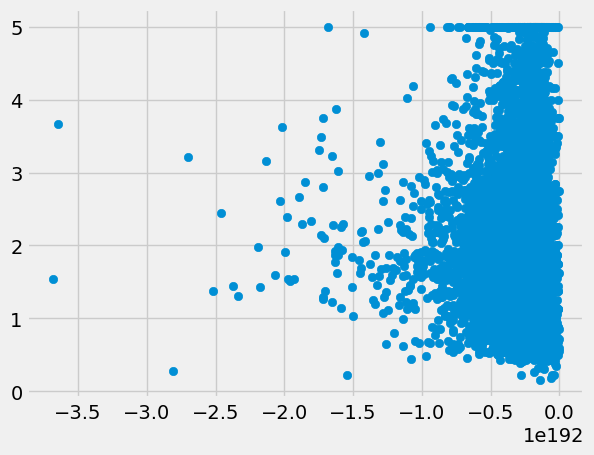

In [10]:
plt.scatter(Predicted_Output,y_test)

In [11]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15316,1.3269,19.0,3.987578,1.153209,1190.0,2.463768,33.20,-117.36
14772,2.7361,14.0,4.206612,0.983471,1224.0,3.371901,32.57,-117.07
12870,3.8355,15.0,6.419753,1.039781,2626.0,3.602195,38.71,-121.40
13476,4.3958,10.0,6.154506,1.013948,3528.0,3.785408,34.09,-117.39


In [12]:
df_final.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Checking the Sk lerarn lasso regression Model 

In [13]:
from sklearn import linear_model

In [14]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train.to_numpy(),y_train.to_numpy())


Lasso(alpha=0.1)

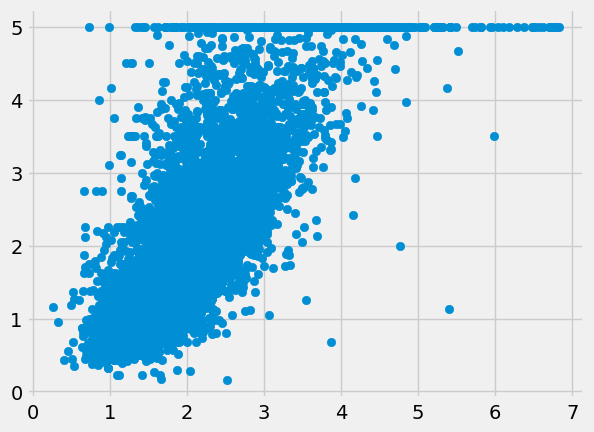

In [18]:
Ypred_test = reg.predict(X_test)
plt.scatter(Ypred_test,y_test)


In [19]:
reg.coef_

array([ 3.90146134e-01,  1.49612412e-02, -0.00000000e+00,  0.00000000e+00,
        1.88492759e-05, -3.02172341e-03, -1.13711335e-01, -1.00149349e-01])